In [2]:
import sys
sys.path.insert(1,'../../../../Projects/Coding/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import trapmodels
import kidcalc

from kidata import io,plot,calc,noise,filters

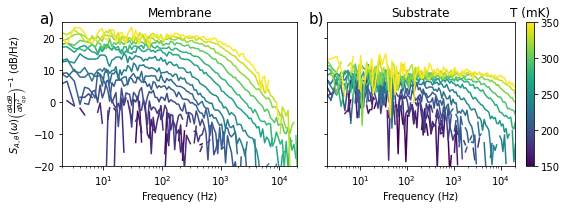

In [10]:
importlib.reload(plot)
Tmax = 350
Tmin = 150
Pread = 99

fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True,sharex=True,squeeze=False)
for i,KIDnum in enumerate([2,3]):
    plot.spec('LT165',[KIDnum],pltPread=[Pread],spec=['cross'],Tminmax=(Tmin,Tmax),
              lvlcomp='Resp',comptres=False,
              ax12=axs[0:1,i:i+1],clbar=False)
axs[0,0].set_title('Membrane')
axs[0,1].set_title('Substrate')
axs[0,0].set_ylabel(r'$S_{A,\theta}(\omega)\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[0,1].set_ylabel('')
axs[0,0].set_xlabel('Frequency (Hz)')
axs[0,1].set_xlabel('Frequency (Hz)')
axs[0,0].set_ylim(-20,25)
axs[0,0].set_xlim(2e0,2e4)
for ax,letter in zip([axs[0,0],axs[0,1]],['a)','b)']):
    ax.text(-.1,1,letter,transform=ax.transAxes,size=15)

clb = plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(Tmin,Tmax),
                                               matplotlib.cm.get_cmap('viridis')))
clb.ax.set_title('T (mK)')
fig.tight_layout()
fig.savefig('CrossSpec.pdf')

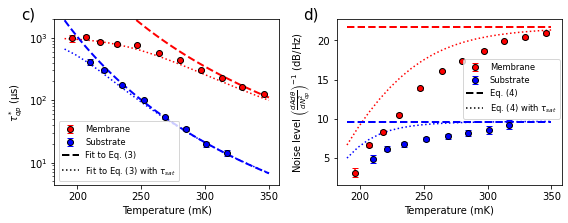

In [24]:
importlib.reload(calc)
importlib.reload(plot)
importlib.reload(trapmodels)
Tmax = 350
Tmin = 190
Pread = 99

fig,axs = plt.subplots(1,2,figsize=(8,3.2))
for i,(KIDnum,clr,label,relerr) in enumerate(zip(
    [2,3],['r','b'],['Membrane','Substrate'],[.135,.135])):  
    
    plot.ltnlvl('LT165',[KIDnum],[Pread],Tminmax=(Tmin,Tmax),lvlcomp='Resp',
                ax12=axs,color=clr,label=label,fmt='o',tescPread=[Pread],
               pltkaplan=True,pltthlvl=True,relerrthrs=relerr,
                showfit=False,tescpltkaplan=False)
    
    
    V,kbTc,tesc = trapmodels.get_KIDparam('LT165',KIDnum,Pread,
                                          tescPread=[Pread],tescrelerrthrs=relerr)
    model = trapmodels.Rt(V,kbTc,tesc)
    
    e = 0 #trap energy
    nrTraps = V*1.72e4*1.76*kbTc/2
    xi = 1
    t1 = 1e3*2
    
    T,tau,tauerr,NL,NLerr = model.calc_ltnlvl(Tmin*1e-3,Tmax*1e-3,
        e,nrTraps,t1,xi,plotspec=False,plotnumrates=False,PSDs='N')
    axs[0].plot(T*1e3,tau,linestyle='dotted',color=clr,alpha=1)
    axs[1].plot(T*1e3,10*np.log10(NL),linestyle='dotted',color=clr,alpha=1)

theoryline = matplotlib.lines.Line2D([0,1],[0,1],linestyle='--', color='k',linewidth=2.,
                                    label = 'Fit to Eq. (3)')
satline = matplotlib.lines.Line2D([0,1],[0,1],linestyle='dotted',color='k',alpha=1,
                                 label = 'Fit to Eq. (3) with $\\tau_{sat}$')
theoryline1 = matplotlib.lines.Line2D([0,1],[0,1],linestyle='--', color='k',linewidth=2.,
                                    label = 'Eq. (4)')
satline1 = matplotlib.lines.Line2D([0,1],[0,1],linestyle='dotted',color='k',alpha=1,
                                 label = 'Eq. (4) with $\\tau_{sat}$')


axs[0].set_ylim(None,2e3)
axs[0].legend(handles = axs[0].get_legend_handles_labels()[0] + [theoryline, satline],
             fontsize='small')
axs[1].legend(handles = axs[1].get_legend_handles_labels()[0] + [theoryline1, satline1],
             fontsize='small',
              loc='lower right',bbox_to_anchor=(1.01,.374))
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['c)','d)']):
    ax.text(-.15,1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('fits.pdf')

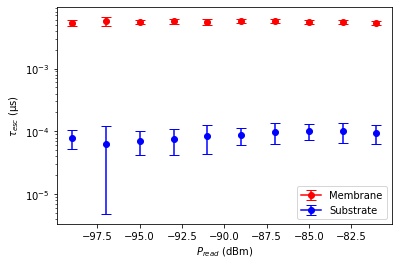

In [64]:
importlib.reload(calc)
fig,ax = plt.subplots()
for Pread in [81,83,85,87,89,91,93,95,97,99]:
    for KIDnum in [2,3]:
        tesc,tescerr = calc.tesc('LT165',KIDnum,Pread=[Pread],relerrthrs=.135,reterr=True,
                                 pltkaplan=False,taunonkaplan=tau)
        ax.errorbar(-1*Pread,tesc,yerr=tescerr,marker='o',capsize=5.,color='b' if KIDnum == 3 else 'r')
#         print(f'KID{KIDnum}, -{Pread} dBm\n tesc = {tesc} +/- {tescerr} µs\n'+
#              f' phonon trapping factor: {1+tesc/.28e-3}\n')
ax.set_yscale('log')
ax.set_xlabel('$P_{read}$ (dBm)')
ax.set_ylabel(r'$\tau_{esc}$ (µs)')
ax.legend(['Membrane','Substrate'])

../../../../Projects/Coding\kidata\calc.py:93: UserWarning: Too little points in window to do tau fit.
  warnings.warn('Too little points in window to do tau fit.')
../../../../Projects/Coding\kidata\calc.py:93: UserWarning: Too little points in window to do tau fit.
  warnings.warn('Too little points in window to do tau fit.')


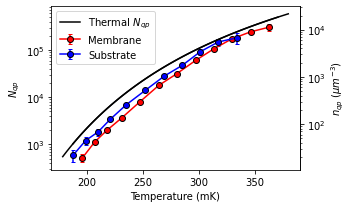

In [14]:
importlib.reload(plot)
fig,ax = plt.subplots(figsize=(5,3))
for KIDnum,clr,label in zip([2,3],['r','b'],['Membrane','Substrate']):
    plot.Nqp('LT165',KIDnum,[99],fig=fig,ax=ax,clr=clr,label=label,relerrthrs=.3,
            nqpaxis=(KIDnum==2))
handles,labels = ax.get_legend_handles_labels()
fig.tight_layout()
fig.savefig('Nqp.pdf')

Supplementary
---

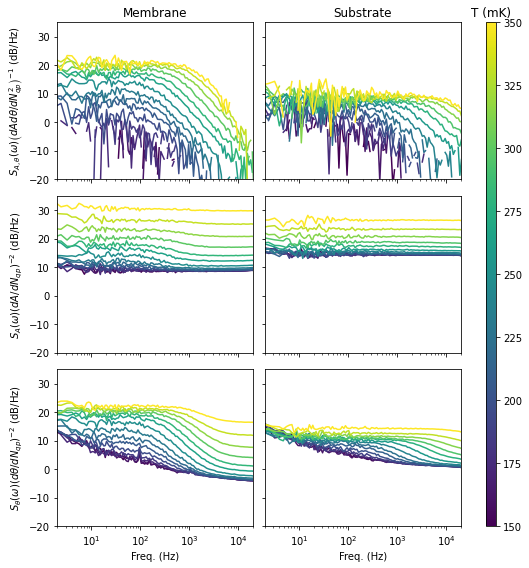

In [118]:
importlib.reload(plot)
fig,axs = plt.subplots(3,2,figsize=(8,8),sharex='col',sharey='row')

Tmin = 150
Tmax = 350
for i,(KIDnum,subs) in enumerate(zip([2,3],['Membrane','Substrate'])):
    plot.spec('LT165',[KIDnum],pltPread=[99],spec='all',Tminmax=(Tmin,Tmax),
              lvlcomp='Resp',
              ax12=axs[:,i:i+1].T,clbar=False)
    
for j,(ylabel,ylim) in enumerate(zip([r'$S_{A,\theta}(\omega)\left(dAd\theta/dN_{qp}^2\right)^{-1}$',
                          r'$S_{A}(\omega)\left(dA/dN_{qp}\right)^{-2}$',
                          r'$S_{\theta}(\omega)\left(d\theta/dN_{qp}\right)^{-2}$'],
                                    [(-120,-75),
                                    (-107,-87),
                                    (-95,-63)])):
    axs[j,0].set_ylabel(ylabel + ' (dB/Hz)')
    axs[j,1].set_ylabel('')
    axs[j,0].set_ylim(-20,35)

    
    for k in range(2):
        axs[j,k].set_title('')
        axs[j,k].set_xlim(2e0,2e4)
        
for ax in [axs[0,0],axs[1,0],axs[1,1],axs[0,1]]:
    ax.set_xlabel('')
axs[0,0].set_title('Membrane')
axs[0,1].set_title('Substrate')

fig.tight_layout()

clb = plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(Tmin,Tmax),
                                               matplotlib.cm.get_cmap('viridis')),ax=axs,aspect=50)
clb.ax.set_title('T (mK)')
fig.savefig('AllPSDs.pdf')

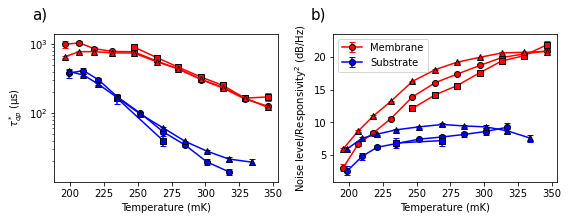

In [121]:
importlib.reload(calc)
importlib.reload(plot)
importlib.reload(filters)
Tmax = 350
Tmin = 190
Pread = 99

fig,axs = plt.subplots(1,2,figsize=(8,3.2),sharex=True)
for i,(KIDnum,clr,ax,l1) in enumerate(zip([2,3],['r','b'],
                                       [axs,axs],['Membrane','Substrate'])):  
    for spec,fmt,l2 in zip(['cross','amp','phase'],['o','s','^'],
                           [r' $S_{A,\theta}$',r' $S_{A}$',r' $S_{\theta}$']):
        plot.ltnlvl('LT165',[KIDnum],[Pread],Tminmax=(Tmin,Tmax),lvlcomp='Resp',
                    spec=spec,delampNoise=(spec!='cross'),
                    ax12=ax,color=clr,label=l1,fmt=fmt+'-',tescPread=[Pread],
                   pltkaplan=False,pltthlvl=False,relerrthrs=.16,
                    showfit=False,tescpltkaplan=False)
axs[1].set_ylabel(r'Noise level/Responsivity$^{2}$ (dB/Hz)')
handles,labels  = axs[1].get_legend_handles_labels()
axs[1].legend([handles[0],handles[3]],[labels[0],labels[3]])
for ax,letter in zip(axs,['a)','b)']):
    ax.text(-.1,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('Allfits.pdf')

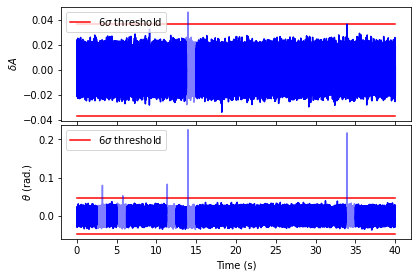

In [82]:
rawnoise = io.get_noisebin('LT165',2,99,141)

Amp,Phase = noise.to_ampphase(rawnoise)
Amp = 1-Amp
fig,axs = plt.subplots(2,1,figsize=(6,4),sharex=True)
for data,ax in zip([Amp,Phase],axs):
    _,rejs = noise.rej_pulses(data)
    
    segdata = np.array(np.array_split(noise.subtr_offset(data),32))
    ax.plot([0,40],np.ones(2)*6*segdata.std(1).min(),'r',label='$6\sigma$ threshold')
    ax.plot([0,40],-1*np.ones(2)*6*segdata.std(1).min(),'r')
    t = np.linspace(0,len(segdata[0])/5e4,len(segdata[0])) 
    for seg,rej in zip(segdata,rejs):
        ax.plot(t,seg,'b',alpha=.5 if rej else 1)
        t+=1.25+2e-5
        
for ax,ylabel in zip(axs,['$\delta A$','$\\theta$ (rad.)']):
    ax.legend()
    ax.set_ylabel(ylabel)
    
axs[1].set_xlabel('Time (s)')
fig.tight_layout(h_pad=0)
fig.savefig('TimeTracePulseRej.pdf')

../../../../Projects/Coding\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')
../../../../Projects/Coding\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


(0.00010066450492400815, 6.662389108033834e-05)


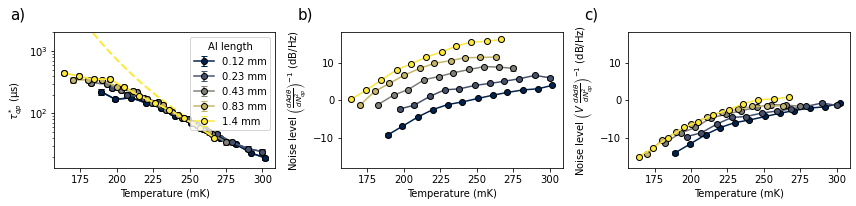

In [7]:
importlib.reload(plot)
importlib.reload(kidcalc)
fig,axs = plt.subplots(1,3,figsize=(12,3))
cmap = matplotlib.cm.get_cmap('cividis')
norm = matplotlib.colors.Normalize(np.log10(.12),np.log10(1.4))
for KIDnum,Pread,length in zip([8,4,13,11,1],
                            [112,110,113,112,113],
                           [.12,.23,.43,.83,1.4]):
    
    plot.ltnlvl('LT179',KIDnum,[Pread],color=cmap(norm(np.log10(length))),ax12=[axs[0],axs[2]],
              relerrthrs=.13,lvlcomp='RespV')
    plot.ltnlvl('LT179',KIDnum,[Pread],color=cmap(norm(np.log10(length))),ax12=axs[:2],relerrthrs=.13,
                pltkaplan=(KIDnum == 1),lvlcomp='Resp',label=f'{length} mm',showfit=False)

    if KIDnum == 1:
        print(calc.tesc('LT179',KIDnum,reterr=True))
axs[0].legend(title='Al length')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[2].set_ylabel(r'Noise level $\left(V~\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[1].set_ylim(-18,18)
axs[2].set_ylim(-18,18)
for ax,letter in zip(axs,['a)','b)','c)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('LengthVariation.pdf')

../../../../Projects/Coding\kidata\calc.py:128: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')
../../../../Projects/Coding\kidata\calc.py:128: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


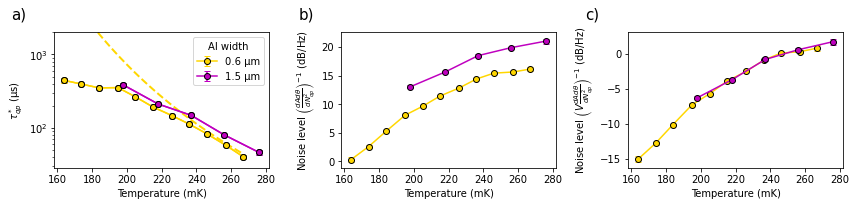

In [36]:
importlib.reload(plot)
fig,axs = plt.subplots(1,3,figsize=(12,3))

for Chipnum,width,Pread,clr in zip(['LT179','LT179Wide'],
                           [.6,1.5],[113,105],['gold','m']):
    plot.ltnlvl(Chipnum,1,[Pread],color=clr,ax12=[axs[0],axs[2]],relerrthrs=.13,
               lvlcomp='RespV')
    
    plot.ltnlvl(Chipnum,1,[Pread],color=clr,ax12=axs[:2],relerrthrs=.13,
                pltkaplan=(Chipnum == 'LT179'),pltthlvl=False,lvlcomp='Resp',
                label=f'{width} µm',showfit=False)
axs[0].legend(title='Al width')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[2].set_ylabel(r'Noise level $\left(V\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['a)','b)','c)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('WidthVariation.pdf')

../../../../Projects/Coding\kidata\calc.py:128: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


20.704715097893416 1.255


../../../../Projects/Coding\kidata\io.py:105: UserWarning: No S21data at this Pread. Closest value is selected: -96 dBm instead of -97 dBm
  warnings.warn(f'No S21data at this Pread. '+


11.438944774652148 1.35


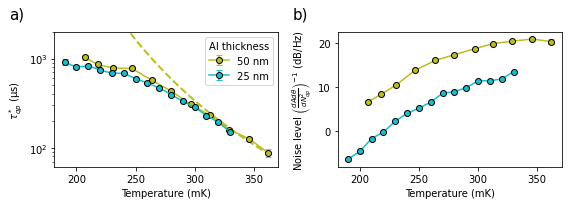

In [38]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

for Chipnum,d,Pread,clr in zip(['LT165','LT165W2'],
                           [50,25],[99,97],['tab:olive','tab:cyan']):
    plot.ltnlvl(Chipnum,2,[Pread],color=clr,ax12=axs,relerrthrs=.13,
                pltkaplan=(Chipnum == 'LT165'),pltthlvl=False,lvlcomp='Resp',
                label=f'{d} nm',showfit=False)
    print((1+calc.tesc(Chipnum,2)/.28e-3),io.get_S21data(Chipnum,2,Pread)[0,21])
axs[0].legend(title='Al thickness')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['a)','b)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=12)
fig.tight_layout()
fig.savefig('ThicknessVariation5025.pdf')

../../../../Projects/Coding\kidata\io.py:105: UserWarning: No S21data at this Pread. Closest value is selected: -96 dBm instead of -98 dBm
  warnings.warn(f'No S21data at this Pread. '+
../../../../Projects/Coding\kidata\io.py:105: UserWarning: No S21data at this Pread. Closest value is selected: -96 dBm instead of -98 dBm
  warnings.warn(f'No S21data at this Pread. '+
../../../../Projects/Coding\kidata\io.py:105: UserWarning: No S21data at this Pread. Closest value is selected: -102 dBm instead of -108 dBm
  warnings.warn(f'No S21data at this Pread. '+


3.13150852976878


../../../../Projects/Coding\kidata\calc.py:128: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')
../../../../Projects/Coding\kidata\calc.py:243: UserWarning: tesc (nan) is not valid and set to 0 µs. LT139, KID6
  warnings.warn(


1.2


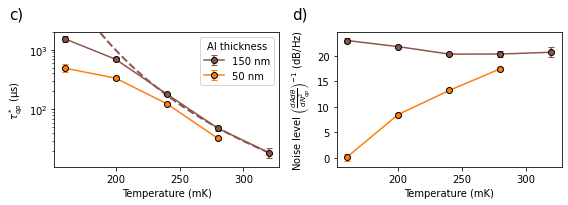

In [39]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

for Chipnum,d,Pread,clr in zip(['LT145','LT139'],
                           [150,50],[98,108],['tab:brown','tab:orange']):
    plot.ltnlvl(Chipnum,6,[Pread],color=clr,ax12=axs,relerrthrs=.2,
                pltkaplan=(Chipnum == 'LT145'),tescPread='min',lvlcomp='Resp',
                label=f'{d} nm',showfit=False)
    print((1+calc.tesc(Chipnum,6)/.28e-3)*io.get_S21data(Chipnum,6,Pread)[0,21])
axs[0].legend(title='Al thickness')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['c)','d)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('ThicknessVariation50150.pdf')

../../../../Projects/Coding\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


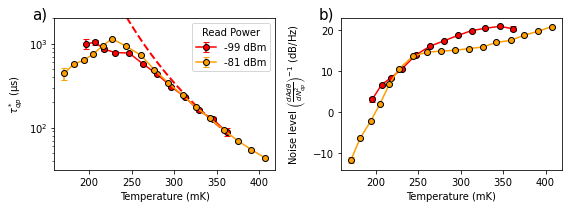

In [31]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

cmap = matplotlib.cm.get_cmap('autumn')
norm = matplotlib.colors.Normalize(-99,-70)
for Pread in [99,81]:
    plot.ltnlvl('LT165',2,[Pread],color=cmap(norm(-1*Pread)),ax12=axs,relerrthrs=.2,
                pltkaplan=(Pread == 99),lvlcomp='Resp',
                label=f'-{Pread} dBm',showfit=False)
axs[0].legend(title='Read Power')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['a)','b)']):
    ax.text(-.1,1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('ReadPower.pdf')

0.0002786024371041359


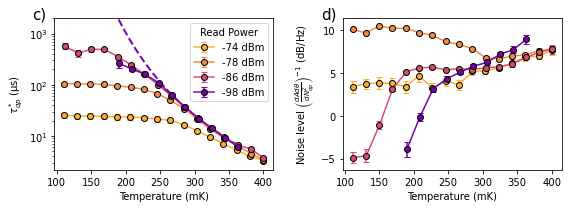

In [33]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

cmap = matplotlib.cm.get_cmap('plasma')
norm = matplotlib.colors.Normalize(-98*1.1,-74*.9)
for Pread in [74,78,86,98]:
    plot.ltnlvl('LT179Wide',8,[Pread],color=cmap(norm(-1*Pread)),ax12=axs,relerrthrs=.2,
                pltkaplan=(Pread == 98),tescPread='min',lvlcomp='Resp',
                label=f'-{Pread} dBm',showfit=False)
    if Pread == 98:
        print(calc.tesc('LT179Wide',8,'min'))
axs[0].legend(title='Read Power')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['c)','d)']):
    ax.text(-.1,1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('ReadPowerExcessQPs.pdf')

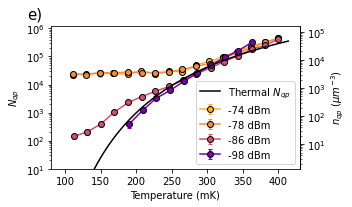

In [36]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,1,figsize=(5,3))

cmap = matplotlib.cm.get_cmap('plasma')
norm = matplotlib.colors.Normalize(-98*1.1,-74*.9)
for Pread in [74,78,86,98]:
    plot.Nqp('LT179Wide',8,[Pread],clr=cmap(norm(-1*Pread)),fig=fig,ax=axs,
                pltThrm=(Pread == 74),nqpaxis=(Pread==74),label=f'-{Pread} dBm')
axs.legend()
axs.set_ylim(1e1,None)
axs.text(-.1,1.05,'e)',transform=axs.transAxes,size=15)
fig.tight_layout()
fig.savefig('ReadPowerExcessQPsNqp.pdf')

In [327]:
io.get_grPread(io.get_grTDparam('LT179Wide'),8)

array([74, 78, 82, 86, 90, 94, 98], dtype=uint8)

In [338]:
io.get_Vdict('LT179Wide')

{1: 85.56,
 2: 85.56,
 4: 13.56,
 5: 13.56,
 6: 7.56,
 8: 7.56,
 10: 49.56,
 11: 49.56,
 12: 25.56}

In [339]:
7.56/1.5/.04

126.0

555623.4918251301 20800.29251429796
919271.65200001 56292.87255561463


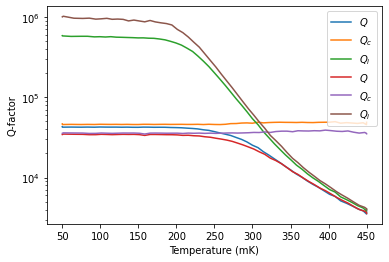

In [374]:
fig,ax = plt.subplots()
for KIDnum in [2,3]:
    print(io.get_S21data('LT165',KIDnum,99)[:20,4].mean(),
         io.get_S21data('LT165',KIDnum,99)[:20,4].std())
    plot.Qfactors('LT165',KIDnum,99,ax=ax)

C:\Users\stevendr\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\stevendr\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\stevendr\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\stevendr\anaconda3\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous

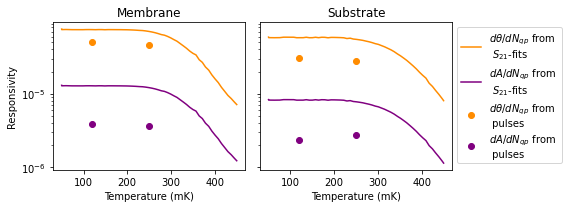

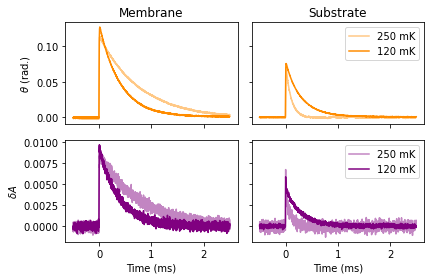

In [41]:
Chipnum = 'LT165'
fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True)
fig2,axs2 = plt.subplots(2,2,figsize=(6,4),sharey='row',sharex='col')
for KIDnum,Pread,ax,ax2 in zip([2,3],[85,83],axs,[axs2[:,0],axs2[:,1]]):

    #S21
    S21data = io.get_S21data(Chipnum,KIDnum,Pread)
    ax.plot(S21data[:,1]*1e3,S21data[:,10],'-',color='darkorange',
           label='$d\\theta/dN_{qp}$ from \n $S_{21}$-fits')
    ax.plot(S21data[:,1]*1e3,S21data[:,18],'-',color='purple',
           label='$dA/dN_{qp}$ from \n $S_{21}$-fits')
    ax.set_yscale('log')

    #Pulse
    for T in [250,120]:
        phase,amp = io.get_pulsedata(Chipnum,KIDnum,Pread,T,1545)
        t = np.arange(len(phase))-500
        dNqp = .59*6.582e-4*3e8*2*np.pi/1.545/(1.76*86.17*S21data[0,21])
        ax.plot(T,phase.max()/dNqp,'o',color='darkorange',
               label='$d\\theta/dN_{qp}$ from \n pulses')
        ax.plot(T,-1*amp.min()/dNqp,'o',color='purple',
               label='$dA/dN_{qp}$ from \n pulses')
        ax2[0].plot(t*1e-3,phase,
                    color='darkorange',label=f'{T} mK',alpha=120/T)
        ax2[1].plot(t*1e-3,-1*amp,
                    color='purple',label=f'{T} mK',alpha=120/T)
    ax.set_xlabel('Temperature (mK)')

handles,labels = axs[1].get_legend_handles_labels()
labels = dict(zip(labels,handles))
axs[1].legend(labels.values(),labels.keys(),bbox_to_anchor=(1,1))
axs[0].set_ylabel('Responsivity')
axs[0].set_title('Membrane')
axs[1].set_title('Substrate')
fig.tight_layout()
fig.savefig('Resp.pdf')

axs2[0,0].set_title('Membrane')
axs2[0,1].set_title('Substrate')
axs2[0,0].set_ylabel('$\\theta$ (rad.)')
axs2[1,0].set_ylabel('$\delta A$ ')
axs2[0,1].legend()
axs2[1,1].legend()
axs2[1,0].set_xlabel('Time (ms)')
axs2[1,1].set_xlabel('Time (ms)')
fig2.tight_layout()
fig2.savefig('Pulses.pdf')

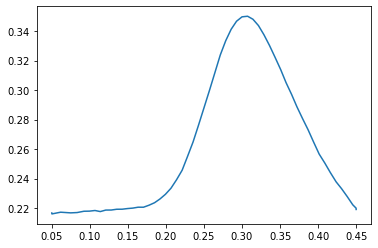

In [83]:
S21data = io.get_S21data('LT165',2,99)

Pabs = (10**(S21data[0,7]/10)/2*4*S21data[:,2]**2/(S21data[:,4]*S21data[:,3])\
        *1e-3/1.602e-19) #µeV/µs
etaread = 3e-4
D = 1.76*86.17*S21data[:,21]
V = S21data[0,14]

A = etaread*Pabs/(V*D)
Gbar = 40*1e-6 #µs^-1 µm^-3
rc =.1



c = .61/(4*np.pi/3*rc**3*(np.log(Gbar/(A*rc**6)))**3)
plt.plot(S21data[:,1],c)

In [132]:
t0 = .44
N0 = 1.72e4
kb = 86.17
Tc = S21data[0,21]
D =  1.76*kb*Tc
tsat = 1e3

R = 2*D**2/(t0*N0*(kb*Tc)**3)
nt =  1/(2*R*tsat)
print(nt)

66.05346661931819


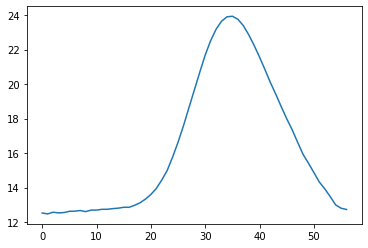

In [115]:
plt.plot(np.sqrt(A/Gbar))